In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
# Reference for customizing plots : http://matplotlib.org/users/customizing.html
# print(plt.style.available)

import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2)
print("Classes {}".format(np.unique(y)))

Classes [0 1]


In [3]:
list(data.target_names)

['malignant', 'benign']

In [4]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

# Building Black box models

In [5]:
from sklearn.metrics import f1_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

models = {'gb':GradientBoostingClassifier(), 
          'mlp':MLPClassifier(), 
          'knn':KNeighborsClassifier(), 
          'reg':LogisticRegression()}

for model_key in models:
    model = models[model_key]
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds)
    print("F1 for {0}: {1}".format(model_key, f1))

F1 for gb: 0.9933774834437086
F1 for mlp: 0.967741935483871
F1 for knn: 0.9589041095890412
F1 for reg: 0.9594594594594594


# Estimate Feature Importance

2020-03-17 01:35:29,284 - skater.core.explanations - WARNING - Progress bars slow down runs by 10-20%. For slightly 
faster runs, do progress_bar=False


[30/30] features ████████████████████ Time elapsed: 3 seconds

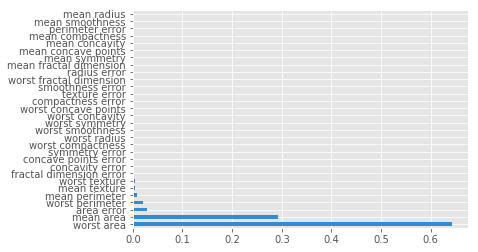

In [6]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(X_test, feature_names=data.feature_names)
model = InMemoryModel(models['knn'].predict_proba, examples=X_train)
plots = interpreter.feature_importance.plot_feature_importance(model, ascending = False)

# Tree surrogate model

2020-03-17 01:35:33,096 - skater.core.global_interpretation.tree_surrogate - INFO - post pruning applied ...
2020-03-17 01:35:33,104 - skater.core.global_interpretation.tree_surrogate - INFO - Scorer used f1-score
2020-03-17 01:35:33,107 - skater.core.global_interpretation.tree_surrogate - INFO - original score using base model 1.0
2020-03-17 01:35:33,125 - skater.core.global_interpretation.tree_surrogate - INFO - Summary: childrens of the following nodes are removed [2, 6, 7, 9, 13, 15]
2020-03-17 01:35:33,126 - skater.core.global_interpretation.tree_surrogate - INFO - Done generating prediction using the surrogate, shape (455,)
2020-03-17 01:35:33,132 - skater.core.global_interpretation.tree_surrogate - INFO - Done scoring, surrogate score 0.991; oracle score 0.94
2020-03-17 01:35:33,529 - skater.util.dataops - INFO - File Name: simple_tree_pre.png


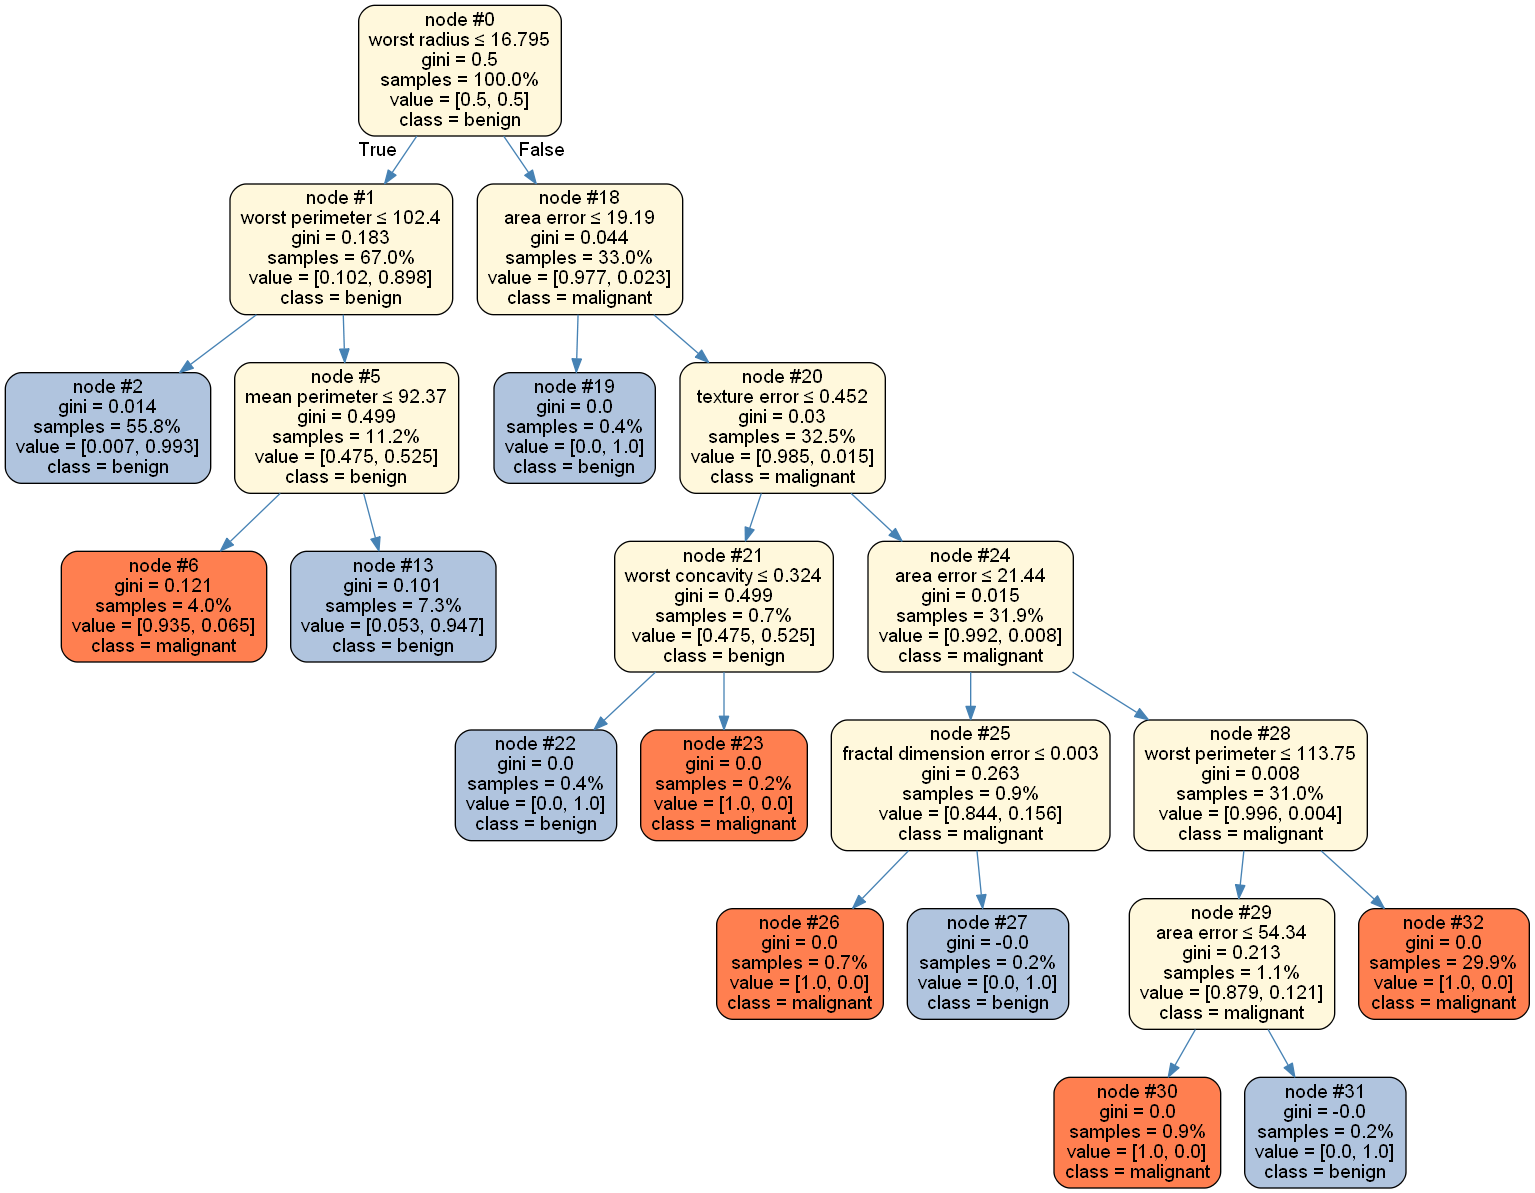

In [7]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel
from skater.util.logger import _INFO
from skater.util.dataops import show_in_notebook
interpreter = Interpretation(X_train, feature_names=data.feature_names)
model_inst = InMemoryModel(models['knn'].predict, examples=X_train, model_type='classifier', unique_values=[0, 1],
                       feature_names=data.feature_names, target_names=data.target_names, log_level=_INFO)
# Using the interpreter instance invoke call to the TreeSurrogate
surrogate_explainer = interpreter.tree_surrogate(oracle=model_inst, seed=5)
surrogate_explainer.fit(X_train, y_train, use_oracle=True, prune='post', scorer_type='default')
surrogate_explainer.plot_global_decisions(colors=['coral', 'lightsteelblue','darkkhaki'],
                                          file_name='simple_tree_pre.png')
show_in_notebook('simple_tree_pre.png', width=400, height=300)